# WeatherPy Assignment - David Edwards

# Analysis:

* Confirming our initial hypothesis, cities located within the region of the equator experience warmer temperatures.  However, it is also important to note that a considerable number of cities located below the equator are also experiencing temperatures resembling that of those located within the equator.

* Almost an inverse can be seen as true when factoring humidity, as higher concentrations of humidity can be found to gravitate towards the northern and equatorial regions.

* Unfortunately, cloudiness shows no significant patterns when adjusting for latitude.  The same can be said for wind speed.  However, I wonder if this is just due to the time/day our data was gathered.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API Key
from config import (gkey, weather_api) 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_rante = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ['City Name']
cities_df

,City Name
0,pribor
1,atuona
2,ushuaia
3,dikson
4,longyearbyen
5,cape town
6,rikitea
7,avarua
8,vaini
9,porto novo


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

query_url = f"{url}appid={weather_api}&units={unit}&q="

row_count = cities_df.count()

In [5]:
city = []
country = []
temp = []
humidity = []
latitude = []
longitude = []
cloudiness = []
wind_speed = []

In [6]:
for index, row in cities_df.iterrows():   
    row_count = 0   
    city_name = row['City Name'] 
    print(f"Beginning Data Retrieval for City #{index}: {city_name}.")
    response = requests.get(query_url + city_name).json()
    time.sleep(2)
    
    try:
        print(f"Processing record for {city_name}.")
        print(response)
        city.append(response['name'])
        country.append(response['sys']['country'])
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
              
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
    print("----------------------------------")

Beginning Data Retrieval for City #0: pribor.
Processing record for pribor.
{'coord': {'lon': 18.14, 'lat': 49.64}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 27.5, 'pressure': 999, 'humidity': 92, 'temp_min': 26.6, 'temp_max': 28.4}, 'visibility': 9000, 'wind': {'speed': 8.05, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1548721800, 'sys': {'type': 1, 'id': 6842, 'message': 0.0039, 'country': 'CZ', 'sunrise': 1548743069, 'sunset': 1548776226}, 'id': 3067544, 'name': 'Pribor', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #1: atuona.
Processing record for atuona.
{'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.33, 'pressure': 1024.1, 'humidity': 100, 'temp_min': 80.33, 'temp_max': 80.33, 'sea_level': 1024.15, 'grnd_level': 1024.1}, 'wind': {'speed': 18.25, 'deg'

Processing record for saint-philippe.
{'coord': {'lon': -73.48, 'lat': 45.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -3.02, 'pressure': 1023, 'humidity': 53, 'temp_min': -7.61, 'temp_max': -0.41}, 'visibility': 14484, 'wind': {'speed': 6.93, 'deg': 60}, 'clouds': {'all': 1}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 820, 'message': 0.0041, 'country': 'CA', 'sunrise': 1548764292, 'sunset': 1548798982}, 'id': 6138908, 'name': 'Saint-Philippe', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #15: upernavik.
Processing record for upernavik.
{'coord': {'lon': -56.15, 'lat': 72.79}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 11.25, 'pressure': 1022.8, 'humidity': 97, 'temp_min': 11.25, 'temp_max': 11.25, 'sea_level': 1026.1, 'grnd_level': 1022.8}, 'wind': {'speed': 9.42, 'deg': 158.501}, 

Processing record for bethel.
{'coord': {'lon': -161.76, 'lat': 60.79}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 29.7, 'pressure': 1018, 'humidity': 100, 'temp_min': 28.4, 'temp_max': 30.2}, 'visibility': 1609, 'wind': {'speed': 3.36, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1548720480, 'sys': {'type': 1, 'id': 7640, 'message': 0.0047, 'country': 'US', 'sunrise': 1548789127, 'sunset': 1548816545}, 'id': 5880568, 'name': 'Bethel', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #30: banda aceh.
Processing record for banda aceh.
{'coord': {'lon': 95.32, 'lat': 5.56}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 72.63, 'pressure': 998.48, 'humidity': 100, 'temp_min':

Processing record for ilebo.
{'coord': {'lon': 20.59, 'lat': -4.33}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.47, 'pressure': 979.92, 'humidity': 90, 'temp_min': 75.47, 'temp_max': 75.47, 'sea_level': 1022.98, 'grnd_level': 979.92}, 'wind': {'speed': 3.49, 'deg': 328.501}, 'clouds': {'all': 48}, 'dt': 1548722288, 'sys': {'message': 0.0028, 'country': 'CD', 'sunrise': 1548736890, 'sunset': 1548781192}, 'id': 215976, 'name': 'Ilebo', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #43: roald.
Processing record for roald.
{'coord': {'lon': 6.12, 'lat': 62.58}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 30.74, 'pressure': 991, 'humidity': 80, 'temp_min': 28.4, 'temp_max': 33.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 180}, 'clouds': {'all': 64}, 'dt': 1548721200, 'sys': {'t

Processing record for hobart.
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1006, 'humidity': 45, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 9545, 'message': 0.0043, 'country': 'AU', 'sunrise': 1548702472, 'sunset': 1548754728}, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #57: cidreira.
Processing record for cidreira.
{'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.37, 'pressure': 1018.75, 'humidity': 89, 'temp_min': 76.37, 'temp_max': 76.37, 'sea_level': 1028.85, 'grnd_level': 1018.75}, 'wind': {'speed': 6.96, 'deg': 0.500977}, 'rain': {'3h': 0.505

Processing record for san juan.
{'coord': {'lon': 121.03, 'lat': 14.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1018, 'humidity': 73, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 8160, 'message': 0.0039, 'country': 'PH', 'sunrise': 1548714284, 'sunset': 1548755593}, 'id': 1692193, 'name': 'San Juan', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #72: kashi.
Processing record for kashi.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----------------------------------
Beginning Data Retrieval for City #73: ozgon.
Processing record for ozgon.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----------------------------------
Beginning Data Retrieval for City #74: sentyabrskiy.
Processing record for 

Processing record for puerto ayora.
{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1009, 'humidity': 70, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 8521, 'message': 0.0032, 'country': 'EC', 'sunrise': 1548763801, 'sunset': 1548807541}, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #89: porto-vecchio.
Processing record for porto-vecchio.
{'coord': {'lon': 9.28, 'lat': 41.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 35.64, 'pressure': 1001, 'humidity': 100, 'temp_min': 32, 'temp_max': 41}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 154872000

Processing record for fort nelson.
{'coord': {'lon': -122.69, 'lat': 58.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.4, 'pressure': 1030, 'humidity': 92, 'temp_min': 10.4, 'temp_max': 10.4}, 'visibility': 19312, 'wind': {'speed': 3.36, 'deg': 230}, 'clouds': {'all': 90}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 986, 'message': 0.0034, 'country': 'CA', 'sunrise': 1548779083, 'sunset': 1548807830}, 'id': 5955902, 'name': 'Fort Nelson', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #103: saint anthony.
Processing record for saint anthony.
{'coord': {'lon': -111.68, 'lat': 43.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.97, 'pressure': 1026, 'humidity': 56, 'temp_min': 14, 'temp_max': 24.98}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 50}, 'clouds': {'all': 1}, 'dt': 1

Processing record for illoqqortoormiut.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----------------------------------
Beginning Data Retrieval for City #116: taolanaro.
Processing record for taolanaro.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----------------------------------
Beginning Data Retrieval for City #117: geilo.
Processing record for geilo.
{'coord': {'lon': 8.21, 'lat': 60.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -7.65, 'pressure': 883.62, 'humidity': 67, 'temp_min': -7.65, 'temp_max': -7.65, 'sea_level': 1009.4, 'grnd_level': 883.62}, 'wind': {'speed': 2.59, 'deg': 258.001}, 'clouds': {'all': 0}, 'dt': 1548722449, 'sys': {'message': 0.0031, 'country': 'NO', 'sunrise': 1548748304, 'sunset': 1548775772}, 'id': 3155913, 'name': 'Geilo', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #118: kuito.
Pr

Processing record for alofi.
{'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1006, 'humidity': 58, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 7306, 'message': 0.004, 'country': 'NU', 'sunrise': 1548781409, 'sunset': 1548828118}, 'id': 4036284, 'name': 'Alofi', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #131: hithadhoo.
Processing record for hithadhoo.
{'coord': {'lon': 73.08, 'lat': -0.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.53, 'pressure': 1023.94, 'humidity': 100, 'temp_min': 82.53, 'temp_max': 82.53, 'sea_level': 1023.99, 'grnd_level': 1023.94}, 'wind': {'speed': 12.1, 'deg': 342.001}, 'clouds': {

Processing record for umm durman.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----------------------------------
Beginning Data Retrieval for City #145: arraial do cabo.
Processing record for arraial do cabo.
{'coord': {'lon': -42.02, 'lat': -22.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.44, 'pressure': 1031.15, 'humidity': 86, 'temp_min': 78.44, 'temp_max': 78.44, 'sea_level': 1032.1, 'grnd_level': 1031.15}, 'wind': {'speed': 17.47, 'deg': 56.001}, 'clouds': {'all': 0}, 'dt': 1548722512, 'sys': {'message': 0.0037, 'country': 'BR', 'sunrise': 1548750342, 'sunset': 1548797783}, 'id': 3471451, 'name': 'Arraial do Cabo', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #146: kaeo.
Processing record for kaeo.
{'coord': {'lon': 173.78, 'lat': -35.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 's

Processing record for ondjiva.
{'coord': {'lon': 15.73, 'lat': -17.07}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 65.97, 'pressure': 900.08, 'humidity': 93, 'temp_min': 65.97, 'temp_max': 65.97, 'sea_level': 1023.06, 'grnd_level': 900.08}, 'wind': {'speed': 8.86, 'deg': 59.001}, 'rain': {'3h': 2.025}, 'clouds': {'all': 88}, 'dt': 1548722542, 'sys': {'message': 0.0033, 'country': 'AO', 'sunrise': 1548737010, 'sunset': 1548783396}, 'id': 3346821, 'name': 'Ondjiva', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #160: thompson.
Processing record for thompson.
{'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -29.21, 'pressure': 1022, 'humidity': 60, 'temp_min': -29.21, 'temp_max': -29.21}, 'visibility': 9656, 'wind': {'speed': 11.41, 'deg': 320, 'gust': 8.2}, 'clo

Processing record for chapais.
{'coord': {'lon': -74.86, 'lat': 49.78}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -27.41, 'pressure': 1020, 'humidity': 74, 'temp_min': -27.41, 'temp_max': -27.41}, 'visibility': 14484, 'wind': {'speed': 3.38, 'deg': 237.001}, 'clouds': {'all': 20}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 859, 'message': 0.0033, 'country': 'CA', 'sunrise': 1548765395, 'sunset': 1548798546}, 'id': 5919850, 'name': 'Chapais', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #174: beira.
Processing record for beira.
{'coord': {'lon': -8.36, 'lat': 43.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.09, 'pressure': 1020, 'humidity': 81, 'temp_min': 46.4, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1548720000, 'sys':

Processing record for mandalgovi.
{'coord': {'lon': 106.27, 'lat': 45.76}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 4.05, 'pressure': 867.33, 'humidity': 61, 'temp_min': 4.05, 'temp_max': 4.05, 'sea_level': 1038.82, 'grnd_level': 867.33}, 'wind': {'speed': 20.27, 'deg': 347.501}, 'clouds': {'all': 48}, 'dt': 1548722602, 'sys': {'message': 0.0037, 'country': 'MN', 'sunrise': 1548721249, 'sunset': 1548755735}, 'id': 2030065, 'name': 'Mandalgovi', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #188: portel.
Processing record for portel.
{'coord': {'lon': -7.71, 'lat': 38.31}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 1024, 'humidity': 100, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1548720000, 'sys

Processing record for xuddur.
{'coord': {'lon': 43.89, 'lat': 4.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.61, 'pressure': 964.19, 'humidity': 71, 'temp_min': 70.61, 'temp_max': 70.61, 'sea_level': 1025.04, 'grnd_level': 964.19}, 'wind': {'speed': 12.21, 'deg': 78.001}, 'clouds': {'all': 0}, 'dt': 1548722632, 'sys': {'message': 0.0033, 'country': 'SO', 'sunrise': 1548731959, 'sunset': 1548774943}, 'id': 49747, 'name': 'Xuddur', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #202: la palma.
Processing record for la palma.
{'coord': {'lon': -74.39, 'lat': 5.36}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.9, 'pressure': 913.29, 'humidity': 97, 'temp_min': 68.9, 'temp_max': 68.9, 'sea_level': 1022.94, 'grnd_level': 913.29}, 'wind': {'speed': 1.59, 'deg': 41.501}, 'rain': {'3h': 0.56}, 'cl

Processing record for saquena.
{'coord': {'lon': -73.52, 'lat': -4.67}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 83.93, 'pressure': 1007.16, 'humidity': 71, 'temp_min': 83.93, 'temp_max': 83.93, 'sea_level': 1020.42, 'grnd_level': 1007.16}, 'wind': {'speed': 6.51, 'deg': 22.001}, 'clouds': {'all': 36}, 'dt': 1548722663, 'sys': {'message': 0.0032, 'country': 'PE', 'sunrise': 1548759454, 'sunset': 1548803806}, 'id': 3692020, 'name': 'Saquena', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #216: cochrane.
Processing record for cochrane.
{'coord': {'lon': -72.57, 'lat': -47.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.75, 'pressure': 923.02, 'humidity': 48, 'temp_min': 51.75, 'temp_max': 51.75, 'sea_level': 1012.4, 'grnd_level': 923.02}, 'wind': {'speed': 4.72, 'deg': 257.501},

Processing record for new norfolk.
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1006, 'humidity': 44, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 9545, 'message': 0.0033, 'country': 'AU', 'sunrise': 1548702553, 'sunset': 1548754777}, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #230: dien bien.
Processing record for dien bien.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----------------------------------
Beginning Data Retrieval for City #231: bathsheba.
Processing record for bathsheba.
{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'm

Processing record for norman wells.
{'coord': {'lon': -126.83, 'lat': 65.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.2, 'pressure': 1027, 'humidity': 77, 'temp_min': 3.2, 'temp_max': 3.2}, 'visibility': 48279, 'wind': {'speed': 5.82, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 951, 'message': 0.0048, 'country': 'CA', 'sunrise': 1548782803, 'sunset': 1548806108}, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #245: geraldton.
Processing record for geraldton.
{'coord': {'lon': -86.95, 'lat': 49.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -14.81, 'pressure': 1015, 'humidity': 56, 'temp_min': -14.81, 'temp_max': -14.81}, 'visibility': 24140, 'wind': {'speed': 4.7, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1

Processing record for bayji.
{'coord': {'lon': 43.49, 'lat': 34.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.53, 'pressure': 1010.07, 'humidity': 92, 'temp_min': 46.53, 'temp_max': 46.53, 'sea_level': 1025.9, 'grnd_level': 1010.07}, 'wind': {'speed': 9.31, 'deg': 243.501}, 'clouds': {'all': 0}, 'dt': 1548722759, 'sys': {'message': 0.0037, 'country': 'IQ', 'sunrise': 1548734831, 'sunset': 1548772283}, 'id': 97783, 'name': 'Bayji', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #260: grindavik.
Processing record for grindavik.
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.76, 'pressure': 996, 'humidity': 79, 'temp_min': 23, 'temp_max': 24.8}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1548721800, 'sys': {'type

Processing record for lawrenceburg.
{'coord': {'lon': -87.33, 'lat': 35.24}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.03, 'pressure': 1011, 'humidity': 46, 'temp_min': 53.6, 'temp_max': 55.4}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 230, 'gust': 8.2}, 'clouds': {'all': 90}, 'dt': 1548720900, 'sys': {'type': 1, 'id': 2829, 'message': 0.0037, 'country': 'US', 'sunrise': 1548766249, 'sunset': 1548803667}, 'id': 4635849, 'name': 'Lawrenceburg', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #275: sumenep.
Processing record for sumenep.
{'coord': {'lon': 113.87, 'lat': -7.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.72, 'pressure': 1022.8, 'humidity': 99, 'temp_min': 81.72, 'temp_max': 81.72, 'sea_level': 1024.07, 'grnd_level': 1022.8}, 'wind': {'speed': 11.32, 'deg': 2

Processing record for coalinga.
{'coord': {'lon': -120.36, 'lat': 36.14}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 64.65, 'pressure': 1017, 'humidity': 65, 'temp_min': 62.96, 'temp_max': 68}, 'visibility': 4828, 'wind': {'speed': 3.36, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1548719760, 'sys': {'type': 1, 'id': 5097, 'message': 0.0035, 'country': 'US', 'sunrise': 1548774277, 'sunset': 1548811495}, 'id': 5338196, 'name': 'Coalinga', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #288: sao joao da ponte.
Processing record for sao joao da ponte.
{'coord': {'lon': -44.01, 'lat': -15.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.81, 'pressure': 955.2, 'humidity': 86, 'temp_min': 68.81, 'temp_max': 68.81, 'sea_level': 1029.54, 'grnd_level': 955.2}, 'wind': {'speed': 0.81, 'deg': 251.501}, 'rain': {'

Processing record for englewood.
{'coord': {'lon': -104.99, 'lat': 39.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.8, 'pressure': 1023, 'humidity': 76, 'temp_min': 5, 'temp_max': 24.8}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 200}, 'clouds': {'all': 1}, 'dt': 1548721980, 'sys': {'type': 1, 'id': 3958, 'message': 0.0033, 'country': 'US', 'sunrise': 1548771027, 'sunset': 1548807370}, 'id': 5421250, 'name': 'Englewood', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #301: boralday.
Processing record for boralday.
{'coord': {'lon': 76.86, 'lat': 43.36}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 10.4, 'pressure': 1029, 'humidity': 92, 'temp_min': 10.4, 'temp_max': 10.4}, 'visibility': 5000, 'wind': {'speed': 6.71, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1548721800, 'sys': {'type': 1, 'id

Processing record for riosucio.
{'coord': {'lon': -75.7, 'lat': 5.42}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1018, 'humidity': 88, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 40}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 8610, 'message': 0.0032, 'country': 'CO', 'sunrise': 1548760763, 'sunset': 1548803550}, 'id': 3670719, 'name': 'Riosucio', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #318: tulare.
Processing record for tulare.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----------------------------------
Beginning Data Retrieval for City #319: laramie.
Processing record for laramie.
{'coord': {'lon': -105.59, 'lat': 41.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15.31, 'p

Processing record for toora-khem.
{'coord': {'lon': 96.11, 'lat': 52.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -19.67, 'pressure': 884.67, 'humidity': 74, 'temp_min': -19.67, 'temp_max': -19.67, 'sea_level': 1062.29, 'grnd_level': 884.67}, 'wind': {'speed': 2.15, 'deg': 240.501}, 'clouds': {'all': 36}, 'dt': 1548722914, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1548724956, 'sunset': 1548756912}, 'id': 1489401, 'name': 'Toora-Khem', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #332: touros.
Processing record for touros.
{'coord': {'lon': -35.46, 'lat': -5.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1014, 'humidity': 83, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 200}, 'clouds': {'all': 40}, 'dt

Processing record for gracac.
{'coord': {'lon': 20.83, 'lat': 43.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 33.8, 'pressure': 1001, 'humidity': 95, 'temp_min': 33.8, 'temp_max': 33.8}, 'visibility': 7000, 'wind': {'speed': 2.93, 'deg': 133.501}, 'clouds': {'all': 40}, 'dt': 1548721800, 'sys': {'type': 1, 'id': 7029, 'message': 0.0029, 'country': 'RS', 'sunrise': 1548741409, 'sunset': 1548776589}, 'id': 789107, 'name': 'Gracac', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #349: aracoiaba.
Processing record for aracoiaba.
{'coord': {'lon': -38.81, 'lat': -4.37}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77.36, 'pressure': 996.46, 'humidity': 75, 'temp_min': 77.36, 'temp_max': 77.36, 'sea_level': 1027.03, 'grnd_level': 996.46}, 'wind': {'speed': 5.61, 'deg': 78.501}, 'clouds': {'

Processing record for luocheng.
{'coord': {'lon': 114.55, 'lat': 28.29}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 40.23, 'pressure': 1016, 'humidity': 96, 'temp_min': 40.23, 'temp_max': 40.23, 'sea_level': 1039.51, 'grnd_level': 1016}, 'wind': {'speed': 3.15, 'deg': 1.50098}, 'clouds': {'all': 32}, 'dt': 1548722985, 'sys': {'message': 0.003, 'country': 'CN', 'sunrise': 1548717071, 'sunset': 1548755925}, 'id': 7690142, 'name': 'Luocheng', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #364: north bay.
Processing record for north bay.
{'coord': {'lon': -79.46, 'lat': 46.31}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -9.41, 'pressure': 1013, 'humidity': 76, 'temp_min': -9.41, 'temp_max': -9.41}, 'visibility': 1609, 'wind': {'speed': 16.11, 'deg': 60, 'gust': 10.8}, 'clouds': {'all': 90},

Processing record for mizdah.
{'coord': {'lon': 12.98, 'lat': 31.45}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 46.13, 'pressure': 965.98, 'humidity': 75, 'temp_min': 46.13, 'temp_max': 46.13, 'sea_level': 1023.34, 'grnd_level': 965.98}, 'wind': {'speed': 9.75, 'deg': 290.001}, 'rain': {'3h': 1.1}, 'clouds': {'all': 56}, 'dt': 1548723015, 'sys': {'message': 0.0036, 'country': 'LY', 'sunrise': 1548741765, 'sunset': 1548779993}, 'id': 2214827, 'name': 'Mizdah', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #378: tectitan.
Processing record for tectitan.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----------------------------------
Beginning Data Retrieval for City #379: el dorado.
Processing record for el dorado.
{'coord': {'lon': -61.64, 'lat': 6.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'bas

Processing record for darnah.
{'coord': {'lon': 22.64, 'lat': 32.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 60.75, 'pressure': 1021.67, 'humidity': 100, 'temp_min': 60.75, 'temp_max': 60.75, 'sea_level': 1023.18, 'grnd_level': 1021.67}, 'wind': {'speed': 17.25, 'deg': 184.501}, 'clouds': {'all': 0}, 'dt': 1548723045, 'sys': {'message': 0.0038, 'country': 'LY', 'sunrise': 1548739590, 'sunset': 1548777532}, 'id': 87205, 'name': 'Darnah', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #392: chuy.
Processing record for chuy.
{'coord': {'lon': -53.46, 'lat': -33.69}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.46, 'pressure': 1023.94, 'humidity': 93, 'temp_min': 76.46, 'temp_max': 76.46, 'sea_level': 1025.41, 'grnd_level': 1023.94}, 'wind': {'speed': 4.5, 'deg': 88.501}, 'rain': {'3h': 0.585},

Processing record for aitape.
{'coord': {'lon': 142.36, 'lat': -3.15}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.54, 'pressure': 1015.51, 'humidity': 100, 'temp_min': 77.54, 'temp_max': 77.54, 'sea_level': 1023.87, 'grnd_level': 1015.51}, 'wind': {'speed': 3.15, 'deg': 254.501}, 'rain': {'3h': 0.505}, 'clouds': {'all': 92}, 'dt': 1548723078, 'sys': {'message': 0.0034, 'country': 'PG', 'sunrise': 1548707753, 'sunset': 1548751873}, 'id': 2101169, 'name': 'Aitape', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #407: el alto.
Processing record for el alto.
{'coord': {'lon': -68.19, 'lat': -16.5}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 1036, 'humidity': 70, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 70}, 'clouds': {'all': 7

Processing record for opuwo.
{'coord': {'lon': 13.84, 'lat': -18.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.14, 'pressure': 883.62, 'humidity': 33, 'temp_min': 63.14, 'temp_max': 63.14, 'sea_level': 1024.15, 'grnd_level': 883.62}, 'wind': {'speed': 4.61, 'deg': 209.001}, 'clouds': {'all': 0}, 'dt': 1548723108, 'sys': {'message': 0.003, 'country': 'NA', 'sunrise': 1548737378, 'sunset': 1548783935}, 'id': 3354077, 'name': 'Opuwo', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #421: kudahuvadhoo.
Processing record for kudahuvadhoo.
{'coord': {'lon': 72.89, 'lat': 2.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.96, 'pressure': 1024.51, 'humidity': 100, 'temp_min': 80.96, 'temp_max': 80.96, 'sea_level': 1024.56, 'grnd_level': 1024.51}, 'wind': {'speed': 10.76, 'deg': 25.501}, 'clouds': 

Processing record for nombre de dios.
{'coord': {'lon': -104.24, 'lat': 23.85}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1017, 'humidity': 5, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 22530, 'wind': {'speed': 10.29, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1548719220, 'sys': {'type': 1, 'id': 7113, 'message': 0.0028, 'country': 'MX', 'sunrise': 1548769142, 'sunset': 1548808884}, 'id': 3994863, 'name': 'Nombre de Dios', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #435: san nicolas.
Processing record for san nicolas.
{'coord': {'lon': -88.33, 'lat': 14.94}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 66.92, 'pressure': 949.52, 'humidity': 72, 'temp_min': 66.92, 'temp_max': 66.92, 'sea_level': 1027.31, 'grnd_level': 949.52}, 'wind': {'speed': 2.04, 'deg': 43.0

Processing record for abengourou.
{'coord': {'lon': -3.5, 'lat': 6.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.03, 'pressure': 1005.21, 'humidity': 79, 'temp_min': 78.03, 'temp_max': 78.03, 'sea_level': 1024.31, 'grnd_level': 1005.21}, 'wind': {'speed': 6.4, 'deg': 196.001}, 'clouds': {'all': 8}, 'dt': 1548723168, 'sys': {'message': 0.0035, 'country': 'CI', 'sunrise': 1548743537, 'sunset': 1548786116}, 'id': 2293549, 'name': 'Abengourou', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #449: santa cruz.
Processing record for santa cruz.
{'coord': {'lon': -122.03, 'lat': 36.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.3, 'pressure': 1016, 'humidity': 48, 'temp_min': 60.98, 'temp_max': 66.2}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 330}, 'clouds': {'all': 1}, 'dt': 15487218

Processing record for nhulunbuy.
{'coord': {'lon': 136.78, 'lat': -12.18}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1005, 'humidity': 79, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1548721800, 'sys': {'type': 1, 'id': 9576, 'message': 0.0032, 'country': 'AU', 'sunrise': 1548708364, 'sunset': 1548753934}, 'id': 2064735, 'name': 'Nhulunbuy', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #463: noumea.
Processing record for noumea.
{'coord': {'lon': 166.46, 'lat': -22.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1011, 'humidity': 51, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 23.04, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1548721800, 'sys': {'type'

Processing record for corning.
{'coord': {'lon': -77.05, 'lat': 42.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.85, 'pressure': 1014, 'humidity': 47, 'temp_min': 17.96, 'temp_max': 21.92}, 'visibility': 16093, 'wind': {'speed': 6.4, 'deg': 160.501}, 'clouds': {'all': 1}, 'dt': 1548719760, 'sys': {'type': 1, 'id': 3977, 'message': 0.0039, 'country': 'US', 'sunrise': 1548764664, 'sunset': 1548800322}, 'id': 5113760, 'name': 'Corning', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #479: kloulklubed.
Processing record for kloulklubed.
{'coord': {'lon': 134.26, 'lat': 7.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1012, 'humidity': 74, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 24140, 'wind': {'speed': 10.29, 'deg': 60, 'gust': 8.2}, 'clouds': {'all': 75}, 'dt

Processing record for mogadishu.
{'coord': {'lon': 45.34, 'lat': 2.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.26, 'pressure': 1024.99, 'humidity': 100, 'temp_min': 78.26, 'temp_max': 78.26, 'sea_level': 1025, 'grnd_level': 1024.99}, 'wind': {'speed': 22.62, 'deg': 58.501}, 'clouds': {'all': 56}, 'dt': 1548723265, 'sys': {'message': 0.0042, 'country': 'SO', 'sunrise': 1548731448, 'sunset': 1548774757}, 'id': 53654, 'name': 'Mogadishu', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #494: sakrand.
Processing record for sakrand.
{'coord': {'lon': 68.27, 'lat': 26.14}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 1020, 'humidity': 87, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 1500, 'wind': {'speed': 4.7, 'deg': 45}, 'clouds': {'all': 0}, 'dt': 1548720000, 'sys': {'typ

Processing record for coos bay.
{'coord': {'lon': -124.22, 'lat': 43.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.94, 'pressure': 1018, 'humidity': 66, 'temp_min': 55.94, 'temp_max': 55.94}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 150}, 'clouds': {'all': 1}, 'dt': 1548719760, 'sys': {'type': 1, 'id': 5239, 'message': 0.0035, 'country': 'US', 'sunrise': 1548776155, 'sunset': 1548811476}, 'id': 5720495, 'name': 'Coos Bay', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #508: chernyshevskiy.
Processing record for chernyshevskiy.
{'coord': {'lon': 112.47, 'lat': 63.01}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -14.45, 'pressure': 990.54, 'humidity': 64, 'temp_min': -14.45, 'temp_max': -14.45, 'sea_level': 1034.57, 'grnd_level': 990.54}, 'wind': {'speed': 7.07, 'deg': 279.

Processing record for bosaso.
{'coord': {'lon': 49.18, 'lat': 11.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1020.21, 'humidity': 100, 'temp_min': 75.2, 'temp_max': 75.2, 'sea_level': 1028.49, 'grnd_level': 1020.21}, 'wind': {'speed': 11.32, 'deg': 88.001}, 'clouds': {'all': 88}, 'dt': 1548723325, 'sys': {'message': 0.0035, 'country': 'SO', 'sunrise': 1548731256, 'sunset': 1548773111}, 'id': 64013, 'name': 'Bosaso', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #522: batemans bay.
Processing record for batemans bay.
{'coord': {'lon': 150.18, 'lat': -35.71}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 79.83, 'pressure': 1003.35, 'humidity': 78, 'temp_min': 79.83, 'temp_max': 79.83, 'sea_level': 1026.62, 'grnd_level': 1003.35}, 'wind': {'speed': 3.49, 'deg': 27.501},

Processing record for collecchio.
{'coord': {'lon': 10.22, 'lat': 44.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.26, 'pressure': 1008.37, 'humidity': 87, 'temp_min': 24.26, 'temp_max': 24.26, 'sea_level': 1015.88, 'grnd_level': 1008.37}, 'wind': {'speed': 3.38, 'deg': 135.501}, 'clouds': {'all': 0}, 'dt': 1548723357, 'sys': {'message': 0.0042, 'country': 'IT', 'sunrise': 1548744122, 'sunset': 1548778971}, 'id': 3178416, 'name': 'Collecchio', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #537: hofn.
Processing record for hofn.
{'coord': {'lon': -15.21, 'lat': 64.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.31, 'pressure': 999.13, 'humidity': 100, 'temp_min': 28.31, 'temp_max': 28.31, 'sea_level': 1010.29, 'grnd_level': 999.13}, 'wind': {'speed': 17.36, 'deg': 6.50098}, 'clouds'

Processing record for dauriya.
{'coord': {'lon': 116.85, 'lat': 49.93}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -7.07, 'pressure': 933.55, 'humidity': 55, 'temp_min': -7.07, 'temp_max': -7.07, 'sea_level': 1032.91, 'grnd_level': 933.55}, 'wind': {'speed': 7.29, 'deg': 306.501}, 'clouds': {'all': 12}, 'dt': 1548723389, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1548719455, 'sunset': 1548752454}, 'id': 2025099, 'name': 'Dauriya', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #552: traverse city.
Processing record for traverse city.
{'coord': {'lon': -85.62, 'lat': 44.76}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 9.59, 'pressure': 1006, 'humidity': 76, 'temp_min': 5, 'temp_max': 12.56}, 'visibility': 6437, 'wind': {'speed': 9.17, 'deg': 20}, 'clouds': {'all': 90}, 'dt': 15487221

Processing record for ternate.
{'coord': {'lon': 120.72, 'lat': 14.29}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1018, 'humidity': 73, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1548720000, 'sys': {'type': 1, 'id': 8160, 'message': 0.0034, 'country': 'PH', 'sunrise': 1548714332, 'sunset': 1548755693}, 'id': 1682474, 'name': 'Ternate', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #566: kirakira.
Processing record for kirakira.
{'coord': {'lon': 161.92, 'lat': -10.46}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 83.12, 'pressure': 1016.73, 'humidity': 100, 'temp_min': 83.12, 'temp_max': 83.12, 'sea_level': 1019.82, 'grnd_level': 1016.73}, 'wind': {'speed': 8.75, 'deg': 255.001}, 'clouds': {'all

Processing record for pinega.
{'coord': {'lon': 43.39, 'lat': 64.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -8.51, 'pressure': 1026.53, 'humidity': 65, 'temp_min': -8.51, 'temp_max': -8.51, 'sea_level': 1035.54, 'grnd_level': 1026.53}, 'wind': {'speed': 3.38, 'deg': 185.501}, 'clouds': {'all': 0}, 'dt': 1548723450, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1548741718, 'sunset': 1548765476}, 'id': 509483, 'name': 'Pinega', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #580: ksenyevka.
Processing record for ksenyevka.
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
----------------------------------
Beginning Data Retrieval for City #581: ambovombe.
Processing record for ambovombe.
{'coord': {'lon': 46.09, 'lat': -25.18}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'ma

Processing record for bar harbor.
{'coord': {'lon': -68.2, 'lat': 44.39}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.31, 'pressure': 1022, 'humidity': 50, 'temp_min': 8.96, 'temp_max': 12.02}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 10}, 'clouds': {'all': 1}, 'dt': 1548723360, 'sys': {'type': 1, 'id': 3431, 'message': 0.0035, 'country': 'US', 'sunrise': 1548762873, 'sunset': 1548797866}, 'id': 4957320, 'name': 'Bar Harbor', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #594: bolitoc.
Processing record for bolitoc.
{'coord': {'lon': 119.88, 'lat': 15.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 70.25, 'pressure': 1000.75, 'humidity': 92, 'temp_min': 70.25, 'temp_max': 70.25, 'sea_level': 1030.8, 'grnd_level': 1000.75}, 'wind': {'speed': 7.07, 'deg': 104.001}, 'clouds': {'all':

Processing record for neiba.
{'coord': {'lon': -71.42, 'lat': 18.49}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.77, 'pressure': 962.65, 'humidity': 94, 'temp_min': 67.77, 'temp_max': 67.77, 'sea_level': 1028.41, 'grnd_level': 962.65}, 'wind': {'speed': 2.71, 'deg': 115.001}, 'rain': {'3h': 0.15}, 'clouds': {'all': 76}, 'dt': 1548723510, 'sys': {'message': 0.0031, 'country': 'DO', 'sunrise': 1548760793, 'sunset': 1548801473}, 'id': 3495858, 'name': 'Neiba', 'cod': 200}
----------------------------------
Beginning Data Retrieval for City #608: bolobo.
Processing record for bolobo.
{'coord': {'lon': 16.23, 'lat': -2.17}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.55, 'pressure': 985.19, 'humidity': 100, 'temp_min': 71.55, 'temp_max': 71.55, 'sea_level': 1023.26, 'grnd_level': 985.19}, 'wind': {'speed': 0.36, 'deg': 3

In [7]:
cities_weather_df = pd.DataFrame({'Country': country,
                                  'City': city,
                                  "Temperature": temp, 
                                  "Cloudiness": cloudiness,
                                  "Humidity": humidity,
                                  "Wind Speed": wind_speed,
                                  "Latitude": latitude,
                                  "Longitude": longitude,})
                                  
cities_weather_df.to_csv('cities_weather.csv', index=False, header=True)
cities_weather_df

,Country,City,Temperature,Cloudiness,Humidity,Wind Speed,Latitude,Longitude
0,CZ,Pribor,27.50,75,92,8.05,49.64,18.14
1,PF,Atuona,80.33,80,100,18.25,-9.80,-139.03
2,AR,Ushuaia,46.40,40,65,14.99,-54.81,-68.31
3,RU,Dikson,-19.98,0,88,8.75,73.51,80.55
4,NO,Longyearbyen,23.00,75,62,11.41,78.22,15.63
5,ZA,Cape Town,64.40,0,77,16.11,-33.93,18.42
6,PF,Rikitea,80.82,0,99,14.00,-23.12,-134.97
7,CK,Avarua,84.20,40,89,11.41,-21.21,-159.78
8,IN,Vaini,62.60,75,93,9.17,15.34,74.49
9,BR,Porto Novo,80.60,20,61,9.17,-23.68,-45.44


### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

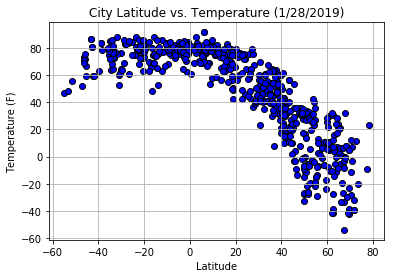

In [8]:
plt.scatter(latitude, temp, marker="o", facecolors ="blue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Temperature (1/28/2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.savefig('City Latitude vs. Temperature.png')
plt.show

### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

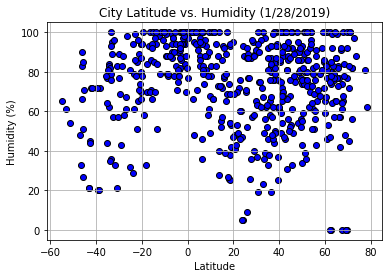

In [9]:
plt.scatter(latitude, humidity, marker="o", facecolors ="blue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Humidity (1/28/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('City Latitude vs. Humidity.png')
plt.show

### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

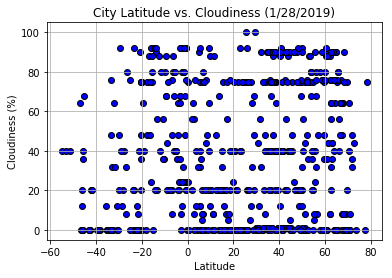

In [10]:
plt.scatter(latitude, cloudiness, marker="o", facecolors ="blue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (1/28/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('City Latitude vs. Cloudiness.png')
plt.show

### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

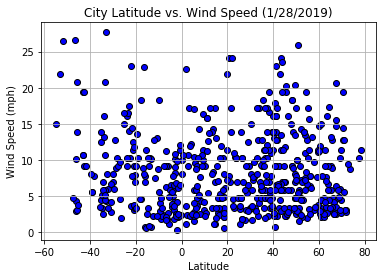

In [11]:
plt.scatter(latitude, wind_speed, marker="o", facecolors ="blue", edgecolors = "black")
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (1/28/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('City Latitude vs. Wind Speed.png')
plt.show